<a href="https://colab.research.google.com/github/aalr007/NavegacionAutonoma/blob/main/4_1_Ejercicio_de_clasificaci%C3%B3n_con_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> ***Navegación Autónoma*** </center>
## <center> ***Actividad 4.1 - Ejercicio de clasificación con Keras*** </center>

### Profesor: Dr. David Antonio Torres
### Alumnos: 
* Andrei García Torres               A01793891
* Aurelio Antonio Lozano Rábago      A01081266
* Jorge Luis Tapia Peñaloza          A01793013
* Luis Alfredo Negron Naldos         A01793865

#### <p style='text-align: right;'> 4 de Junio del 2023 </p>

#Instrucciones
1- Si es necesario, estudia el código y el video que explica el uso de Keras para el diseño, entrenamiento y verificación de redes neuronales, los cuales están disponibles como materiales de aprendizaje en este módulo.

2-Crea un Notebook en Google Colab y sube el dataset que usaste para resolver la detección de peatones con SVM. De preferencia, incorpora el uso de GPU en tu Notebook.

3-Diseña una red neuronal adecuada para detectar peatones. Toma en cuenta el número de entradas de la red, crea un número adecuado de capas ocultas y crea una capa de salida con una sola neurona con salida binaria.

4-Si es el caso, reporta como bibliografía otras fuentes de información que consultaste para llegar a la solución.

5-Crea un video, con una duración menor a dos minutos, en donde expliques los parámetros de la red neuronal y del entrenamiento que permitieron llegar a una solución correcta. Asegúrate de obtener un score de al menos 90%. Sube tu video a tu canal de YouTube y guarda el enlace.

6-A manera de reporte, crea un documento que incluya tu script con los comentarios y el enlace de tu video en YouTube. Tanto el código como los comentarios son importantes para el documento.

obtenemos la base de datos con imagenes de peatones y sin peatones que se uso en la actividad 3.1

https://www.kaggle.com/datasets/tejasvdante/pedestrian-no-pedestrian

#Cargamos Bibliotecas necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
     
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
     
from keras.models import Model

import matplotlib.image as mpimg
import seaborn as sns
import cv2

from google.colab import drive
import glob

#Se carga el dataset y se verifica el número de muestras en cada set

In [2]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/MNA/DetPeatones/*'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pedestrian = glob.glob('/content/drive/MyDrive/MNA/NavAutonoma/DetPeatones/Pedestrian/*')
no_pedestrian = glob.glob('/content/drive/MyDrive/MNA/NavAutonoma/DetPeatones/NoPedestrian/*')

Obtenemos el numero de imagenes que contienen peatones y las que no contienen peatones

In [4]:
len(pedestrian)

808

In [5]:
len(no_pedestrian)

808

Es un problema con clases balanceadas, ya que hay el mismo número de imagenes con y sin peatones

#preprocesamiento imagenes
Formateamos las imagenes a escala de grises, un tamaño comun, y agrupamos los datos

Tamaño comun

In [20]:
Pedestrian_Formated = []
NoPedestrian_Formated = []

width = 400 
height = 250
dim = (width, height)

for i in pedestrian:
    img_color = mpimg.imread(i)
    #convert to grayscale
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    Pedestrian_Formated.append(img_resized)

for i in no_pedestrian:
    img_color = mpimg.imread(i)
    #convert to grayscale
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    NoPedestrian_Formated.append(img_resized)

Creamos las etiquetas

In [21]:
y_pedestrian = np.ones(len(Pedestrian_Formated))
y_Nopedestrian = np.zeros(len(NoPedestrian_Formated))


Combinacion de ambos tipos de datos en una sola pila

In [22]:
X = np.vstack((Pedestrian_Formated,NoPedestrian_Formated))
X.shape

(1616, 250, 400)

In [23]:
y = np.hstack((y_pedestrian,y_Nopedestrian))
y.shape

(1616,)

Se normalizan las intensidades de los pixeles en un intervalo de 0 y 1

In [24]:
X=X/255

Se unidimensionan las imágenes para adecuarlas como capa de entrada en la red neuronal

In [26]:
# 250 x 400 = 100,000
num_pixels = 100000
X = X.reshape(X.shape[0], num_pixels)
print(X.shape)


(1616, 100000)


#Se define el modelo

In [27]:
model = Sequential()
model.add(Dense(units = 30, input_dim=num_pixels, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='softmax'))
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                3000030   
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 3,000,450
Trainable params: 3,000,450
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [32]:
print(X.shape)
print(y.shape)
print(y)

(1616, 100000)
(1616,)
[1. 1. 1. ... 0. 0. 0.]


In [35]:
from sklearn.model_selection import train_test_split

Se separa un 10% del set de entrenamiento para fines de validación

In [36]:
# 25% para el set de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#Una sola neurona con dos entradas, una salida

In [51]:
model = Sequential()
model.add(Dense(units=1, input_dim=100000, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy',  metrics=['accuracy'])

In [52]:
hist = model.fit(x=X_train, y=y_train, verbose=2, batch_size=50,epochs=500, shuffle='true')

Epoch 1/500
25/25 - 1s - loss: 43.1073 - accuracy: 0.5363 - 719ms/epoch - 29ms/step
Epoch 2/500
25/25 - 0s - loss: 12.1562 - accuracy: 0.5726 - 301ms/epoch - 12ms/step
Epoch 3/500
25/25 - 0s - loss: 14.6310 - accuracy: 0.5413 - 302ms/epoch - 12ms/step
Epoch 4/500
25/25 - 0s - loss: 18.3296 - accuracy: 0.5800 - 298ms/epoch - 12ms/step
Epoch 5/500
25/25 - 0s - loss: 10.9787 - accuracy: 0.6271 - 285ms/epoch - 11ms/step
Epoch 6/500
25/25 - 0s - loss: 11.4746 - accuracy: 0.5957 - 300ms/epoch - 12ms/step
Epoch 7/500
25/25 - 0s - loss: 4.0160 - accuracy: 0.7038 - 285ms/epoch - 11ms/step
Epoch 8/500
25/25 - 0s - loss: 4.3974 - accuracy: 0.7038 - 284ms/epoch - 11ms/step
Epoch 9/500
25/25 - 0s - loss: 8.7839 - accuracy: 0.6254 - 289ms/epoch - 12ms/step
Epoch 10/500
25/25 - 0s - loss: 2.9766 - accuracy: 0.7401 - 300ms/epoch - 12ms/step
Epoch 11/500
25/25 - 0s - loss: 3.3897 - accuracy: 0.7211 - 306ms/epoch - 12ms/step
Epoch 12/500
25/25 - 0s - loss: 2.7133 - accuracy: 0.7434 - 302ms/epoch - 12ms/

Se muestra un resumen del modelo, así como la evaluación de los resultados

In [53]:
# resumen del model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 100001    
                                                                 
Total params: 100,001
Trainable params: 100,001
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'Epoca')

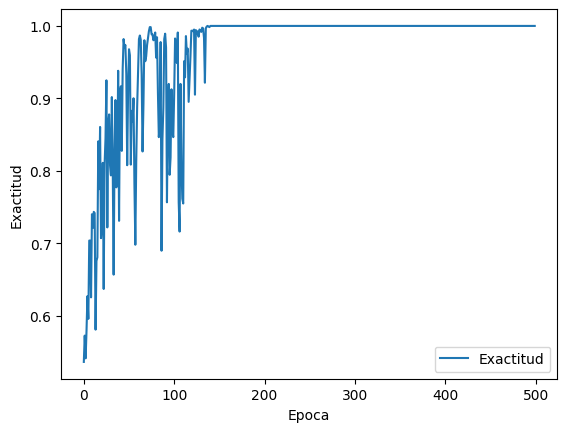

In [54]:
# Exactitud del modelo
plt.plot(hist.history['accuracy']) 
plt.legend(['Exactitud'])
plt.ylabel('Exactitud')
plt.xlabel('Epoca')

Text(0.5, 0, 'Epoca')

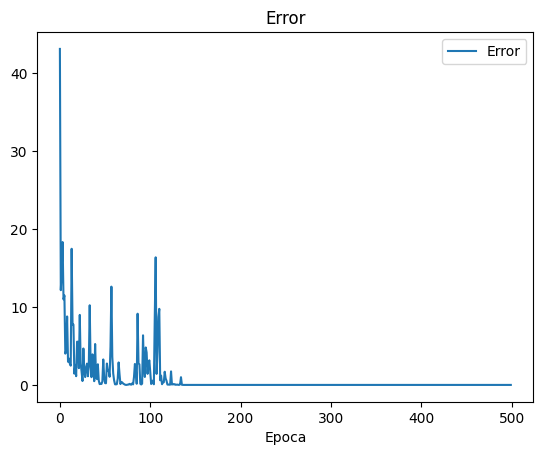

In [55]:
# Función de pérdida
plt.plot(hist.history['loss'])
plt.legend(['Error'])
plt.title('Error')
plt.xlabel('Epoca')

In [56]:
# Se calculan las predicciones del modelo para graficar la matriz de confusión
# Se compara contra 0.5 para determinar si es clase 0 ó clase 1
# ya que la salida que da la función Sigmoid es continua entre 0 y 1
y_predict = (model.predict(X_test) > 0.5).astype("int32")

13/13 [==============================] - 0s 8ms/step


<Axes: >

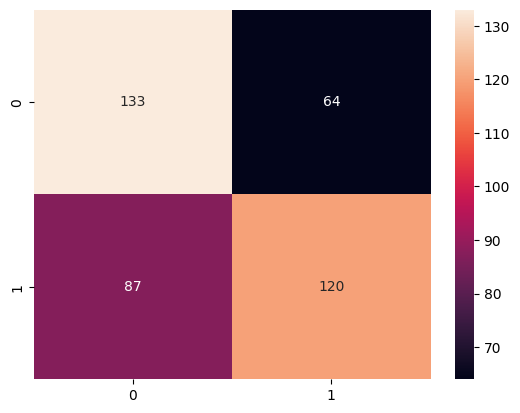

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d")